In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from pymks import (
    plot_microstructures,
    PrimitiveTransformer,
    TwoPointCorrelation
)

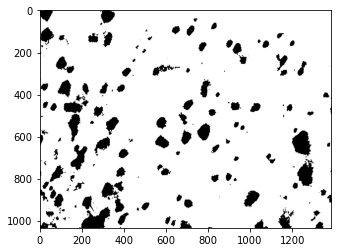

In [18]:
im = Image.open('AlScEr_bin.png')
plt.imshow(im)

In [9]:
imarray = np.expand_dims(np.array(im), axis=0)

In [10]:
data = np.where(imarray == 255, 1, 0)

In [14]:
model = Pipeline(steps=[
    ('discretize', PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0)),
    ('correlations', TwoPointCorrelation(
        periodic_boundary=True,
        cutoff=data.shape[1],
        correlations=[[0, 0], [0, 1], [1, 1]]
    ))
])

In [15]:
data_stats = model.transform(data).persist()

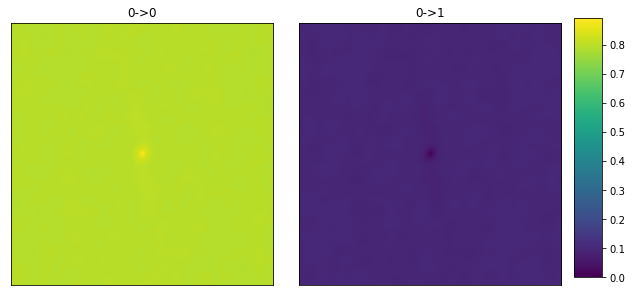

In [25]:
plot_microstructures(
    data_stats[0, :, :, 0], 
    data_stats[0, :, :, 1], 
    titles=['0->0','0->1'],
)

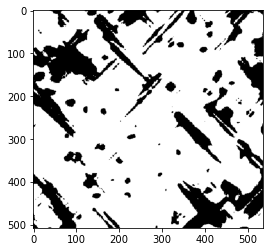

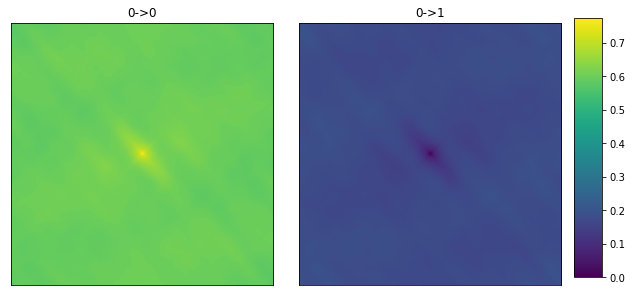

In [26]:
im2 = Image.open('Al.png')
plt.imshow(im2)
plt.show()
imarray2 = np.expand_dims(np.array(im2), axis=0)
data2 = np.where(imarray2 == 255, 1, 0)
model2 = Pipeline(steps=[
    ('discretize', PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0)),
    ('correlations', TwoPointCorrelation(
        periodic_boundary=True,
        cutoff=data2.shape[1],
        correlations=[[0, 0], [0, 1], [1, 1]]
    ))
])
data_stats2 = model.transform(data2).persist()
plot_microstructures(
    data_stats2[0, :, :, 0], 
    data_stats2[0, :, :, 1], 
    titles=['0->0','0->1'],
)